In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#### Prepare for Dataset

In [2]:
transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(), # Add horizontal flipping to increase image diversity
     transforms.RandomRotation(10), #Add rotation to increase image diversity
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, #Increase batch size
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


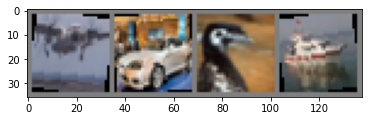

plane   car  bird  ship


In [3]:
def imshow(img):
    img = img / 2 + 0.5 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#### Choose a Device

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  

cuda:0


#### Network Definition

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.convo1 = nn.Conv2d(3,32,3,1,1)
        self.batch1 = nn.BatchNorm2d(32) #Add batch normalization to each convolution block
        self.activation1 = nn.ReLU()
        self.apool1 = nn.AvgPool2d(kernel_size = (2,2))
        
        self.convo2 = nn.Conv2d(32,16,3,1,1)
        self.batch3 = nn.BatchNorm2d(16)
        self.activation2 = nn.ReLU()
        self.apool2 = nn.AvgPool2d(kernel_size = (2,2))
        
        self.convo3 = nn.Conv2d(16,64,3,1,1) #Add a 3rd convolution block
        self.batch3 = nn.BatchNorm2d(64)
        self.activation3 = nn.ReLU()
        self.apool3 = nn.AvgPool2d(kernel_size = (2,2))
        
        self.flat = nn.Flatten()
        
        self.fc1 = nn.Linear(1024,100)
        self.activation3 = nn.ReLU()
        self.fc2 = nn.Linear(100,10)
        
        
    def forward(self, x):
        
        x = self.activation1(self.convo1(x))
        x = self.apool1(x)
        x = self.activation2(self.convo2(x))
        x = self.apool2(x)
        x = self.activation3(self.convo3(x))
        x = self.apool3(x)
        x = self.flat(x)
        x = self.fc1(self.activation3(x))
        x = self.fc2(x)
        
        
        return x 

net = Net()
net.to(device)

Net(
  (convo1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation1): ReLU()
  (apool1): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (convo2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation2): ReLU()
  (apool2): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (convo3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (activation3): ReLU()
  (apool3): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1024, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

#### Optimizer and Loss Function

In [6]:
loss_func = nn.CrossEntropyLoss()  
#Replace stochastic gradient decent with Adam algorithm, no momentum needed
#Adjust the learning rate
opt = optim.Adam(net.parameters(), lr=0.001) 

#### Training Procedure

In [7]:
avg_losses = []  
epochs = 20     #Increase epochs from 10 to 20
print_freq = 1000 #Increase print frequency

for epoch in range(epochs): 
    running_loss = 0.0       
    for i, data in enumerate(trainloader, 0):
      
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        opt.zero_grad()
        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        opt.step()

        running_loss += loss.item()
        if i % print_freq == print_freq - 1:
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:   999] avg mini-batch loss: 1.936
[epoch: 0, i:  1999] avg mini-batch loss: 1.688
[epoch: 0, i:  2999] avg mini-batch loss: 1.561
[epoch: 0, i:  3999] avg mini-batch loss: 1.499
[epoch: 0, i:  4999] avg mini-batch loss: 1.438
[epoch: 0, i:  5999] avg mini-batch loss: 1.390
[epoch: 0, i:  6999] avg mini-batch loss: 1.313
[epoch: 0, i:  7999] avg mini-batch loss: 1.311
[epoch: 0, i:  8999] avg mini-batch loss: 1.293
[epoch: 0, i:  9999] avg mini-batch loss: 1.269
[epoch: 0, i: 10999] avg mini-batch loss: 1.244
[epoch: 0, i: 11999] avg mini-batch loss: 1.246
[epoch: 1, i:   999] avg mini-batch loss: 1.188
[epoch: 1, i:  1999] avg mini-batch loss: 1.198
[epoch: 1, i:  2999] avg mini-batch loss: 1.149
[epoch: 1, i:  3999] avg mini-batch loss: 1.158
[epoch: 1, i:  4999] avg mini-batch loss: 1.152
[epoch: 1, i:  5999] avg mini-batch loss: 1.144
[epoch: 1, i:  6999] avg mini-batch loss: 1.134
[epoch: 1, i:  7999] avg mini-batch loss: 1.104
[epoch: 1, i:  8999] avg mini-batch loss

[epoch: 14, i:  2999] avg mini-batch loss: 0.748
[epoch: 14, i:  3999] avg mini-batch loss: 0.760
[epoch: 14, i:  4999] avg mini-batch loss: 0.793
[epoch: 14, i:  5999] avg mini-batch loss: 0.795
[epoch: 14, i:  6999] avg mini-batch loss: 0.778
[epoch: 14, i:  7999] avg mini-batch loss: 0.745
[epoch: 14, i:  8999] avg mini-batch loss: 0.762
[epoch: 14, i:  9999] avg mini-batch loss: 0.762
[epoch: 14, i: 10999] avg mini-batch loss: 0.818
[epoch: 14, i: 11999] avg mini-batch loss: 0.763
[epoch: 15, i:   999] avg mini-batch loss: 0.734
[epoch: 15, i:  1999] avg mini-batch loss: 0.750
[epoch: 15, i:  2999] avg mini-batch loss: 0.794
[epoch: 15, i:  3999] avg mini-batch loss: 0.775
[epoch: 15, i:  4999] avg mini-batch loss: 0.803
[epoch: 15, i:  5999] avg mini-batch loss: 0.762
[epoch: 15, i:  6999] avg mini-batch loss: 0.740
[epoch: 15, i:  7999] avg mini-batch loss: 0.770
[epoch: 15, i:  8999] avg mini-batch loss: 0.776
[epoch: 15, i:  9999] avg mini-batch loss: 0.791
[epoch: 15, i: 10999

#### Training Loss Curve

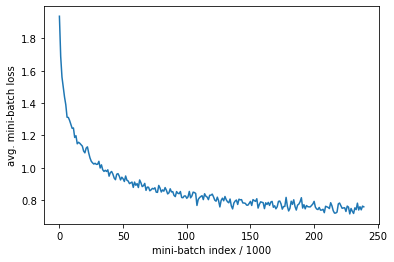

In [8]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

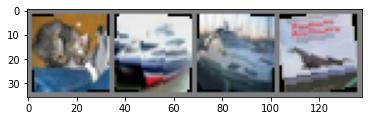

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane


In [9]:
# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [10]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 72 %


In [11]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 73 %
Accuracy of   car : 75 %
Accuracy of  bird : 54 %
Accuracy of   cat : 57 %
Accuracy of  deer : 76 %
Accuracy of   dog : 62 %
Accuracy of  frog : 78 %
Accuracy of horse : 78 %
Accuracy of  ship : 82 %
Accuracy of truck : 89 %
